<a href="https://colab.research.google.com/github/kolovratgas/HPC_labs/blob/main/lab2/Numba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install numba

In [75]:
from numba import njit, jit, int32, cuda
import numba
import numpy as np
import time
from time import time
from matplotlib import pyplot as plt
import pandas as pd


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['int32', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [76]:
x1 = 1_000
x2 = 10_000
x3 = 100_000
x4 = 500_000
x5 = 1_000_000
a1 = np.random.randint(1, 100, x1)
a2 = np.random.randint(1, 100, x2)
a3 = np.random.randint(1, 100, x3)
a4 = np.random.randint(1, 100, x4)
a5 = np.random.randint(1, 100, x5)
c1 = np.zeros(1, dtype = np.int32)

In [77]:
threads_per_block = 16

In [78]:
@cuda.jit
def dev_vec_sum(a, c):
  sh_b = cuda.shared.array(threads_per_block, int32)

  thread_id = cuda.threadIdx.x
  block_id = cuda.blockIdx.x
  idx = thread_id + block_id * threads_per_block
  sh_b[thread_id] = 0

  if idx < a.shape[0]:
    sh_b[thread_id] = a[idx]
    cuda.syncthreads()
    if cuda.threadIdx.x == 0:
      sum_of_arr = 0
      for i in range(threads_per_block):
        sum_of_arr += sh_b[i]
      cuda.atomic.add(c, 0, sum_of_arr)

def DeviceHost(a, c):
    dev_a = cuda.to_device(a)
    dev_c = cuda.to_device(c)
    dev_vec_sum[threads_per_block, threads_per_block](dev_a, dev_c)
    c = dev_c.copy_to_host()

In [97]:
start1 = time.time()
DeviceHost(a1, c1)
end1 = time.time() - start1
print(end1)

0.0044705867767333984


In [80]:
start2 = time.time()
DeviceHost(a2, c1)
end2 = time.time() - start2
print(end2)

0.002707242965698242


In [81]:
start3 = time.time()
DeviceHost(a3, c1)
end3 = time.time() - start3
print(end3)

0.006430625915527344


In [82]:
start4 = time.time()
DeviceHost(a4, c1)
end4 = time.time() - start4
print(end4)

0.006089925765991211


In [83]:
start5 = time.time()
DeviceHost(a5, c1)
end5 = time.time() - start5
print(end5)

0.008217334747314453


In [84]:
def cpu_vec_sum(a):
  return np.sum(a)

In [85]:
startCPU1 = time.time()
cpu_vec_sum(a1)
endCPU1 = time.time() - startCPU1
print(endCPU1)

0.0003566741943359375


In [86]:
startCPU2 = time.time()
cpu_vec_sum(a2)
endCPU2 = time.time() - startCPU2
print(endCPU2)

0.00027179718017578125


In [87]:
startCPU3 = time.time()
cpu_vec_sum(a3)
endCPU3 = time.time() - startCPU3
print(endCPU3)

0.00037479400634765625


In [88]:
startCPU4 = time.time()
cpu_vec_sum(a4)
endCPU4 = time.time() - startCPU4
print(endCPU4)

0.0035865306854248047


In [89]:
startCPU5 = time.time()
cpu_vec_sum(a5)
endCPU5 = time.time() - startCPU5
print(endCPU5)

0.003928661346435547


In [98]:
df1 = pd.DataFrame({'расчёты на CPU':[endCPU1, endCPU2, endCPU3, endCPU4, endCPU5], 'расчёты на GPU':[end1, end2, end3, end4, end5]}, index=[x1, x2, x3, x4, x5])
df1

,расчёты на CPU,расчёты на GPU
1000,0.000357,0.004471
10000,0.000272,0.002707
100000,0.000375,0.006431
500000,0.003587,0.006090
1000000,0.003929,0.008217


In [107]:
cpuX = [endCPU1, endCPU2, endCPU3, endCPU4, endCPU5]
gpuX = [end1, end2, end3, end4, end5]
Y = [x1, x2, x3, x4, x5]

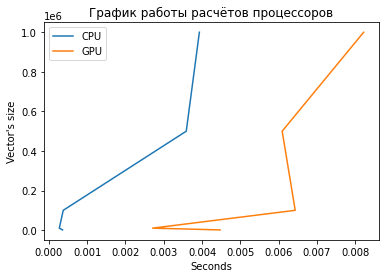

In [123]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(cpuX, Y, label="CPU")
ax1.plot(gpuX, Y, label="GPU")
plt.xlabel("Seconds")
plt.ylabel("Vector's size")
plt.title("График работы расчётов процессоров")
plt.legend()